# SEGMENTACION DE COMPRADORES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
data=pd.read_csv('D:\MiniProyectos_Python\Segmentacion_Compradores-KMeans\dataset\Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.shape

(200, 5)

In [7]:
data.drop("CustomerID",axis=1,inplace=True)    #Se borra la columna innecesaria

In [8]:
#Cambiar nombre a las columnas para que resulte más comodo 
data.columns = ["Gender","Age","income","spending"]

**_Se procedera a tratar de segmentar esta data pequeña de 200 filas_**

# DISTRIBUCION DE DATOS

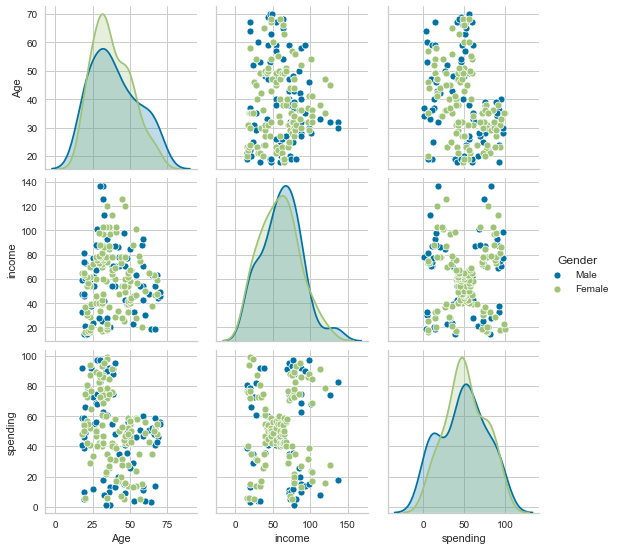

In [9]:
sns.pairplot(data, hue="Gender");

    Aquí se aprecian ya varias distribuciones:

    Diferencia en dos grupos entre Spendindg Score y Age
    Diferencia de 5 grupos entre income y Spending
    Entre sexos la diferencia no parece estar tan clara

In [10]:
data.describe()

,Age,income,spending
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


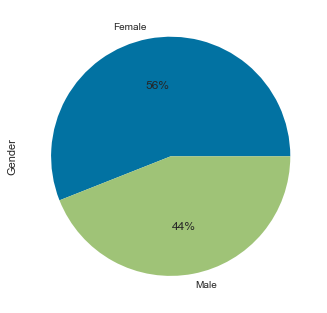

In [11]:
data.Gender.value_counts().plot.pie(autopct='%1.0f%%');

    ¿Existen diferencias de salario por género?

__Usamos T_student para obtener el porcentaje de significancia para verificar la diferencia salarial en base al genero__

In [12]:
def t_student(data1,data2,alpha):
    from scipy.stats import t
    from scipy import stats
    #  Medias
    mean1,mean2=np.mean(data1),np.mean(data2)
    # Error estandar
    se1, se2 = stats.sem(data1), stats.sem(data2)
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # Estadístico T
    t_stat = (mean1 - mean2) / sed
    # Grados de libertad
    g_l = len(data1) + len(data2) - 2
    # Calculo del valor critico
    cv = t.ppf(1.0 - alpha, g_l)
    # p-valor
    p = (1.0 - t.cdf(abs(t_stat), g_l)) * 2.0
    print ( "p-valor: "+ str(p))
    print("")
    if p > alpha:
        
        print("\033[1m  NO existen diferencias significativas entre los grupos")
        
    else:
        print("\033[1m  Existen diferencias significativas entre los grupos")

X1 = data.income[data.Gender == "Male"] # se usa la variable income porque contiene el salario
X2 = data.income[data.Gender == "Female"]

t_student(X1,X2, 0.05)

p-valor: 0.42887570443960166

  NO existen diferencias significativas entre los grupos


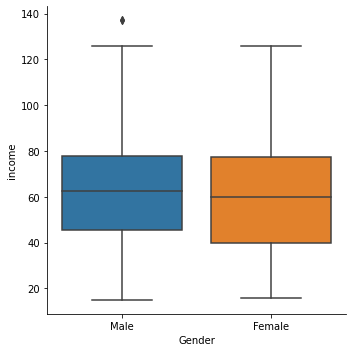

In [13]:
g = sns.catplot(data=data,x="Gender", y = "income", kind="box")
plt.show()

    ¿Existen diferencias de salario por género?

In [13]:
def t_student(data1,data2,alpha):
    from scipy.stats import t
    from scipy import stats
    #  Medias
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # Error estandar
    se1, se2 = stats.sem(data1), stats.sem(data2)
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # Estadístico T
    t_stat = (mean1 - mean2) / sed
    # Grados de libertad
    g_l = len(data1) + len(data2) - 2
    # Calcular el valor critico
    cv = t.ppf(1.0 - alpha, g_l)
    # p-valor
    p = (1.0 - t.cdf(abs(t_stat), g_l)) * 2.0
    
    print ( "p-valor: "+ str(p))
    print("")
    if p > alpha:
        
        print("\033[1m  NO existen diferencias significativas entre los grupos")
        
    else:
        print("\033[1m  Existen diferencias significativas entre los grupos")

X1 = data.spending[data.Gender == "Male"] # se usa la variable income porque contiene el salario
X2 = data.spending[data.Gender == "Female"]

t_student(X1,X2, 0.05)

p-valor: 0.42185540437323055

  NO existen diferencias significativas entre los grupos


__Distribucion con grupos de edad__

In [14]:
cortes = [18,30,45,80]
niveles = ["joven","adulto","anciano"]
data["grupo_edad"] = pd.cut(data.Age, bins= cortes, labels = niveles, right=False)

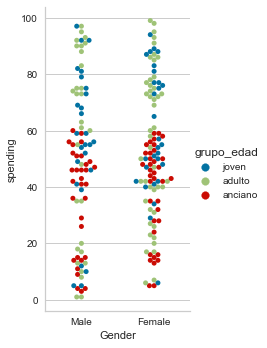

In [15]:
sns.catplot(data=data,x="Gender", y="spending",hue="grupo_edad", aspect=.6,
            kind="swarm");

    Para visualizar mejor

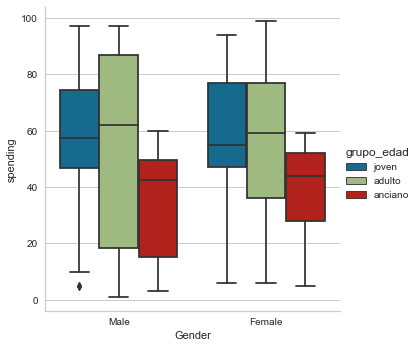

In [16]:
g = sns.catplot(data=data,x="Gender", y = "spending", kind="box", hue="grupo_edad")
plt.show()

    Los ancianos son los que menos gastan y los adultos los que más.
    En todos los grupos los hombres gastan ligeramente más que las mujeres

__Tranformacion de las variables dummy de la data:__

In [17]:
data.drop("grupo_edad",axis=1,inplace=True)

data.Gender.replace(("Male","Female"),(0,1), inplace=True)

In [18]:
data.head()

,Gender,Age,income,spending
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [19]:
data.dtypes

Gender      int64
Age         int64
income      int64
spending    int64
dtype: object

In [20]:
data.Gender = data.Gender.apply(str)
data.Gender.astype('category')
data.dtypes

Gender      object
Age          int64
income       int64
spending     int64
dtype: object

# K-MEANS

__Elegir numero de componentes__

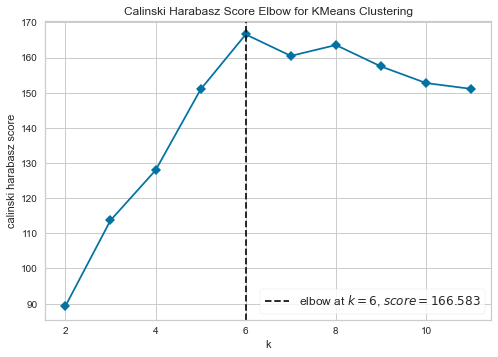

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show();

    El numero óptimo es 6

__Aplicar K-Means__

In [22]:
K = 6 
kmeans = KMeans(n_clusters=K).fit(data)
centroids = kmeans.cluster_centers_                    #Coordenadas de los centroides 
clusters = kmeans.predict(data)                          #Grupo asignado a cada variable 

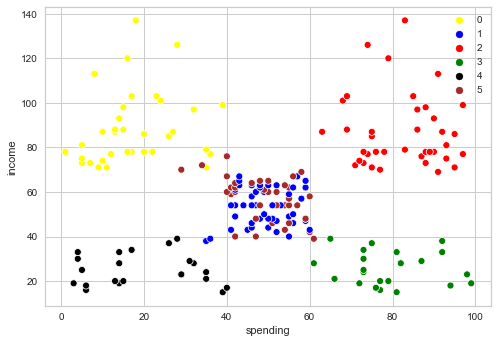

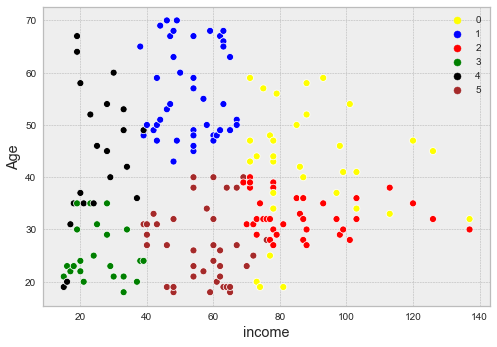

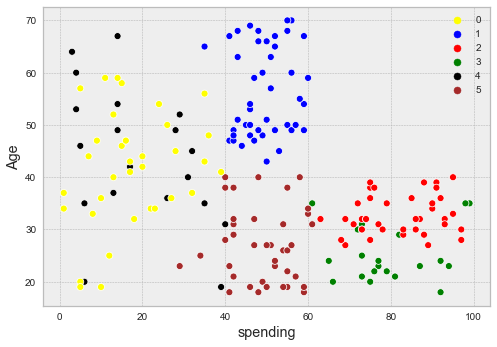

In [23]:
colores = ["yellow","blue","red","green","black","brown"]
sns.scatterplot(data.spending,data.income, hue=clusters, palette=colores);
plt.style.use("bmh") 
plt.show()


sns.scatterplot(data.income,data.Age, hue=clusters, palette=colores);
plt.style.use("bmh") 
plt.show()

sns.scatterplot(data.spending,data.Age, hue=clusters, palette=colores);
plt.style.use("bmh") 
plt.show()

    En general se observa como el cluster ha hecho un gran trabajo en la clasificacion

    Mediante los 6 grupos de clientes identificados se pueden establecer clientes diana a los que dirigir campañas de Marketing especificas